In [1]:
# Import EDA packages and load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
beers = pd.read_csv('beers-breweries-and-beer-reviews/beers.csv')
breweries = pd.read_csv('beers-breweries-and-beer-reviews/breweries.csv')
reviews = pd.read_csv('beers-breweries-and-beer-reviews/reviews.csv')

In [6]:
# Let's look at the reviews!
reviews.shape

(9073128, 10)

In [4]:
# It is interesting that there are reviews that have a final score, but then look/smell/etc
# are NaN. The 'score' feature is derived from the more descriptive features, so it may
# have been an issue with the data collection. I will later drop these entries, as none
# of them have a text review, and the model will end up utilizing the text reviews exclusively
reviews.sample(10)

,beer_id,username,date,text,look,smell,taste,feel,overall,score
8719733,71427,walkinginplace,2015-08-10,,3.25,3.25,3.5,3.25,3.25,3.35
5362472,7605,RuckusDu,2012-08-26,A - Just a half finger of light beige head ...,3.50,4.50,2.5,3.50,3.00,3.24
4024386,138007,Patbrown2,2014-12-30,,3.25,3.25,3.0,3.00,3.25,3.13
8733730,79705,jpa01,2017-02-18,"Appearance: It's a dark black, creamy, dece...",4.00,3.50,4.5,4.25,4.25,4.16
9010212,90903,ricknelson,2014-06-03,This is a God awful beer. I brought this to...,2.50,2.00,1.5,2.00,2.00,1.83
4874393,13637,RyanDonnelly,2014-09-28,,NaN,NaN,NaN,NaN,NaN,4.04
3929399,175675,Abbott,2016-04-10,,4.00,3.50,3.0,3.50,3.25,3.28
7053739,300514,petewheeler,2018-08-08,,4.00,4.00,4.0,4.00,4.00,4.00
3970113,45325,jroberts8811,2014-09-01,,NaN,NaN,NaN,NaN,NaN,3.25
244138,74325,BogBoyJD,2013-06-24,,NaN,NaN,NaN,NaN,NaN,2.25


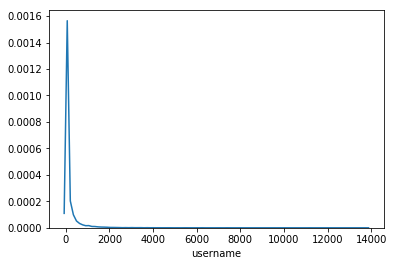

In [3]:
# Distribution plot of users and the number of reviews they have made. Most users have made
# few reviews, and a small portion of them have a large contribution
sns.distplot(reviews.username.value_counts(), hist=False)

In [8]:
# Only around ~1800 users have over 1000 reviews
reviews.username.value_counts()[1820:]

Stum-pub           1000
jwinship83         1000
IvoryFoxhole       1000
Greasy             1000
Aaron_Kerkvliet     998
                   ... 
th3hooligan           1
Seymore_Johnson       1
Apolonaire            1
MrsL2011              1
R2luke2               1
Name: username, Length: 163114, dtype: int64

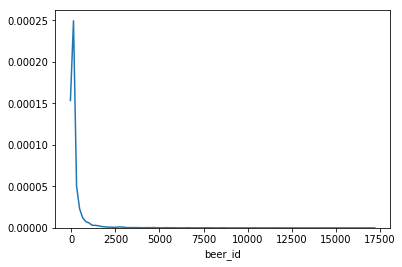

In [6]:
# Now looking at what beers are reviewed, there is a similar trend
sns.distplot(reviews.beer_id.value_counts(), hist=False)

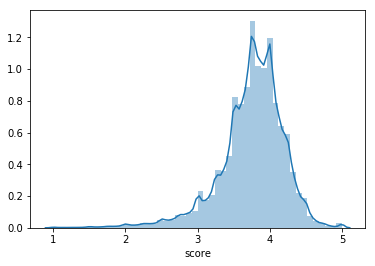

In [14]:
# Below is a distribution of the aveage rating for each beer. Normal-ish! 
sns.distplot(reviews.groupby(['beer_id']).score.mean())

In [12]:
reviews['date']= pd.to_datetime(reviews['date']) 

In [19]:
dt_reviews = reviews.set_index('date')

In [ ]:
dt_reviews[dt_reviews.index.year < 2007].sum()